# Ischemia classification on 5 MRI sequences

## Imports

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate, train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.classifier import ROCAUC

## Ischemia prediction for T1 relaxation time MRI sequence

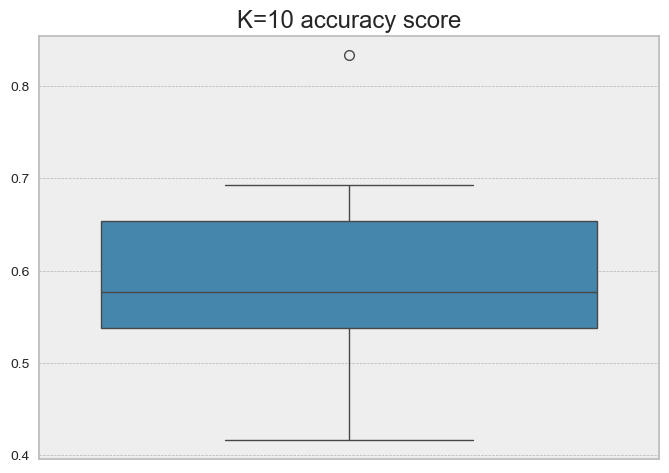

In [109]:
T1 = pd.read_csv("../data/T1_r.csv")
meta_names = ["seqtype", "experiment", "minutes", "vivo_status", "positioning", "ischemia", "kidney_code"]
meta_data = T1["Image"].apply(lambda x: x.split("/")[-1].strip(".nrrd")).str.split("_", expand=True)
meta_data.columns = meta_names
meta_data.experiment = meta_data.experiment.astype(int)
meta_data.minutes = meta_data.minutes.astype(int)
numeric_cols_mask_pd = T1.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x)).values
t1_numeric = T1.loc[:, numeric_cols_mask_pd]
isch = meta_data["ischemia"]

lb = LabelBinarizer()
Xt1 = t1_numeric
yt1 = lb.fit_transform(isch)
xgb_model = XGBClassifier()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_T1 = cross_val_score(xgb_model, Xt1, yt1, cv=kf)
sns.boxplot(scores_T1)
plt.title("K=10 accuracy score")
plt.show()

## Ischemia prediction for T2 relaxation time MRI sequence

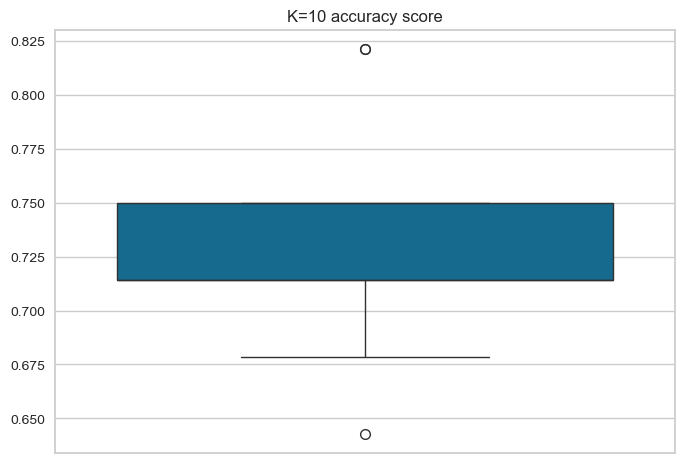

In [73]:
T2 = pd.read_csv("../data/T2_r.csv")
meta_names = ["seqtype", "experiment", "minutes", "vivo_status", "positioning", "ischemia", "kidney_code"]
meta_data = T2["Image"].apply(lambda x: x.split("/")[-1].strip(".nrrd")).str.split("_", expand=True)
meta_data.columns = meta_names
meta_data.experiment = meta_data.experiment.astype(int)
meta_data.minutes = meta_data.minutes.astype(int)
numeric_cols_mask_pd = T2.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x)).values
t2_numeric = T2.loc[:, numeric_cols_mask_pd]
isch = meta_data["ischemia"]

lb = LabelBinarizer()
Xt2 = t2_numeric
yt2 = lb.fit_transform(isch)
xgb_model = XGBClassifier()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_T2 = cross_val_score(xgb_model, Xt2, yt2, cv=kf)
sns.boxplot(scores_T2)
plt.title("K=10 accuracy score")
plt.show()

## Ischemia prediction for T2star relaxation time MRI sequence

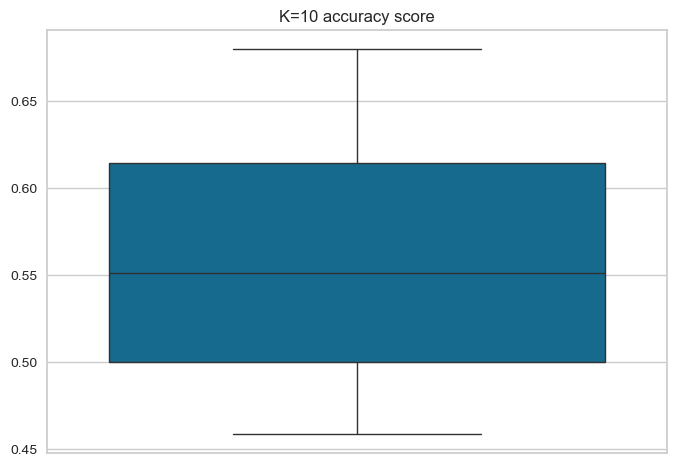

In [74]:
T2star = pd.read_csv("../data/T2star_r.csv")
meta_names = ["seqtype", "experiment", "minutes", "vivo_status", "positioning", "ischemia", "kidney_code"]
meta_data = T2star["Image"].apply(lambda x: x.split("/")[-1].strip(".nrrd")).str.split("_", expand=True)
meta_data.columns = meta_names
meta_data.experiment = meta_data.experiment.astype(int)
meta_data.minutes = meta_data.minutes.astype(int)
numeric_cols_mask_pd = T2star.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x)).values
t2star_numeric = T2star.loc[:, numeric_cols_mask_pd]
isch = meta_data["ischemia"]

lb = LabelBinarizer()
X2s = t2star_numeric
y2s = lb.fit_transform(isch)
xgb_model = XGBClassifier()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_T2star = cross_val_score(xgb_model, X2s, y2s, cv=kf)
sns.boxplot(scores_T2star)
plt.title("K=10 accuracy score")
plt.show()

## Ischemia prediction for ASL relaxation time MRI sequence

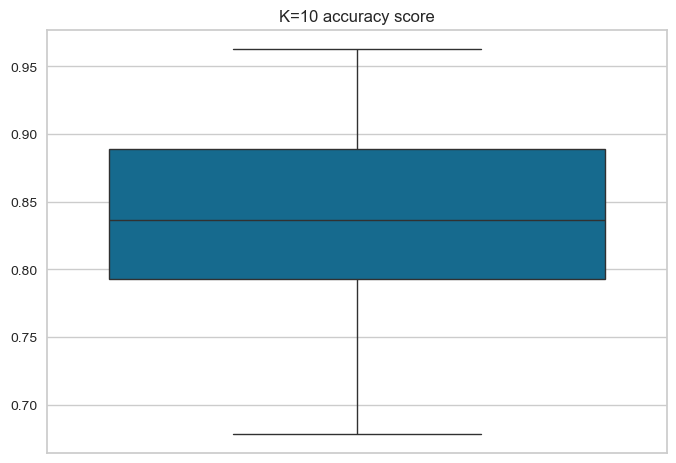

In [ ]:
ASL = pd.read_csv("../data/ASL_r.csv")
meta_names = ["seqtype", "experiment", "minutes", "vivo_status", "positioning", "ischemia", "kidney_code"]
meta_data = ASL["Image"].apply(lambda x: x.split("/")[-1].strip(".nrrd")).str.split("_", expand=True)
meta_data.columns = meta_names
meta_data.experiment = meta_data.experiment.astype(int)
meta_data.minutes = meta_data.minutes.astype(int)
numeric_cols_mask_pd = ASL.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x)).values
ASL_numeric = ASL.loc[:, numeric_cols_mask_pd]
isch = meta_data["ischemia"]

lb = LabelBinarizer()
Xa = ASL_numeric
ya = lb.fit_transform(isch)
xgb_model = XGBClassifier()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_ASL = cross_val_score(xgb_model, Xa, ya, cv=kf)
sns.boxplot(scores_ASL)
plt.title("K=10 accuracy score")
plt.show()

## Ischemia prediction for DWI relaxation time MRI sequence

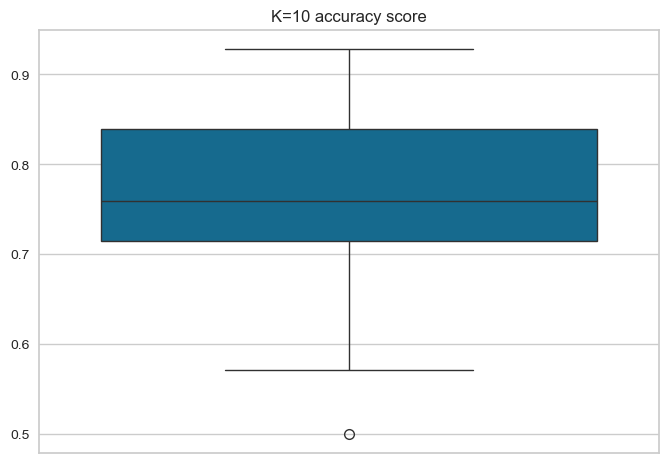

In [76]:
DWI = pd.read_csv("../data/DWI_r.csv")
meta_names = ["seqtype", "experiment", "minutes", "vivo_status", "positioning", "ischemia", "kidney_code"]
meta_data = DWI["Image"].apply(lambda x: x.split("/")[-1].strip(".nrrd")).str.split("_", expand=True)
meta_data.columns = meta_names
meta_data.experiment = meta_data.experiment.astype(int)
meta_data.minutes = meta_data.minutes.astype(int)
numeric_cols_mask_pd = DWI.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x)).values
DWI_numeric = DWI.loc[:, numeric_cols_mask_pd]
isch = meta_data["ischemia"]

lb = LabelBinarizer()
Xd = DWI_numeric
yd = lb.fit_transform(isch)
xgb_model = XGBClassifier()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_DWI = cross_val_score(xgb_model, Xd, yd, cv=kf)
sns.boxplot(scores_DWI)
plt.title("K=10 accuracy score")
plt.show()

## Combined visualization of accuracy scores between MRI sequences

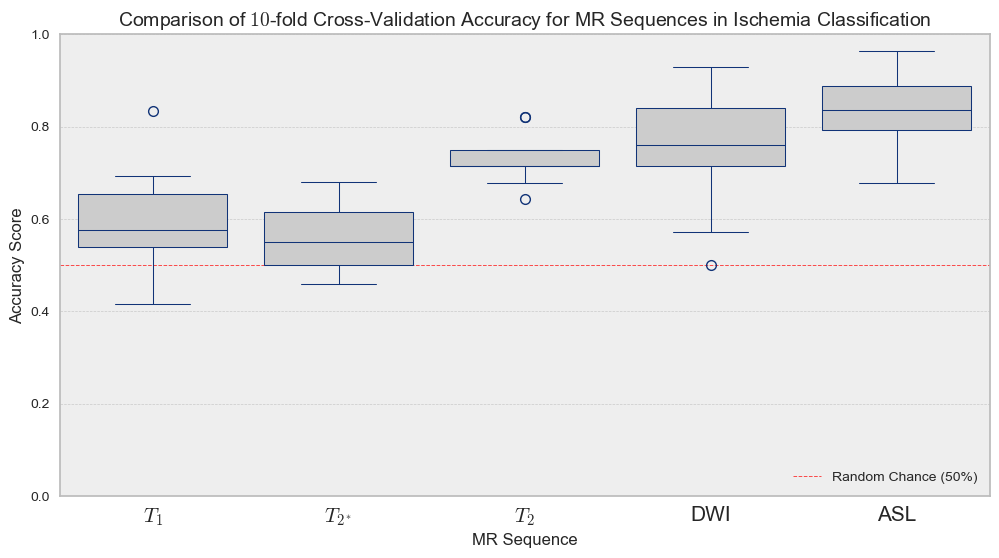

In [ ]:
accuracy_scores = pd.DataFrame(
    {"T1": scores_T1,
     "T2*": scores_T2star,
     "T2": scores_T2,
     "DWI": scores_DWI,
     "ASL": scores_ASL}
)

plt.style.use('bmh')
plt.figure(figsize=(12,6))
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7 ,linewidth=0.7, label=r'Random Chance (50%)')
sns.boxplot(accuracy_scores, color=".8", linecolor="#137", linewidth=.75)
plt.ylim((0, 1))
plt.title(r"Comparison of $10$-fold Cross-Validation Accuracy for MR Sequences in Ischemia Classification", fontsize=14)
plt.xlabel(r"MR Sequence", fontsize=12)
plt.ylabel(r"Accuracy Score", fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[r"$T_1$", r"$T_{2^*}$", r"$T_2$", r"DWI", r"ASL"], fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc="lower right")
plt.show()

#ROC curves

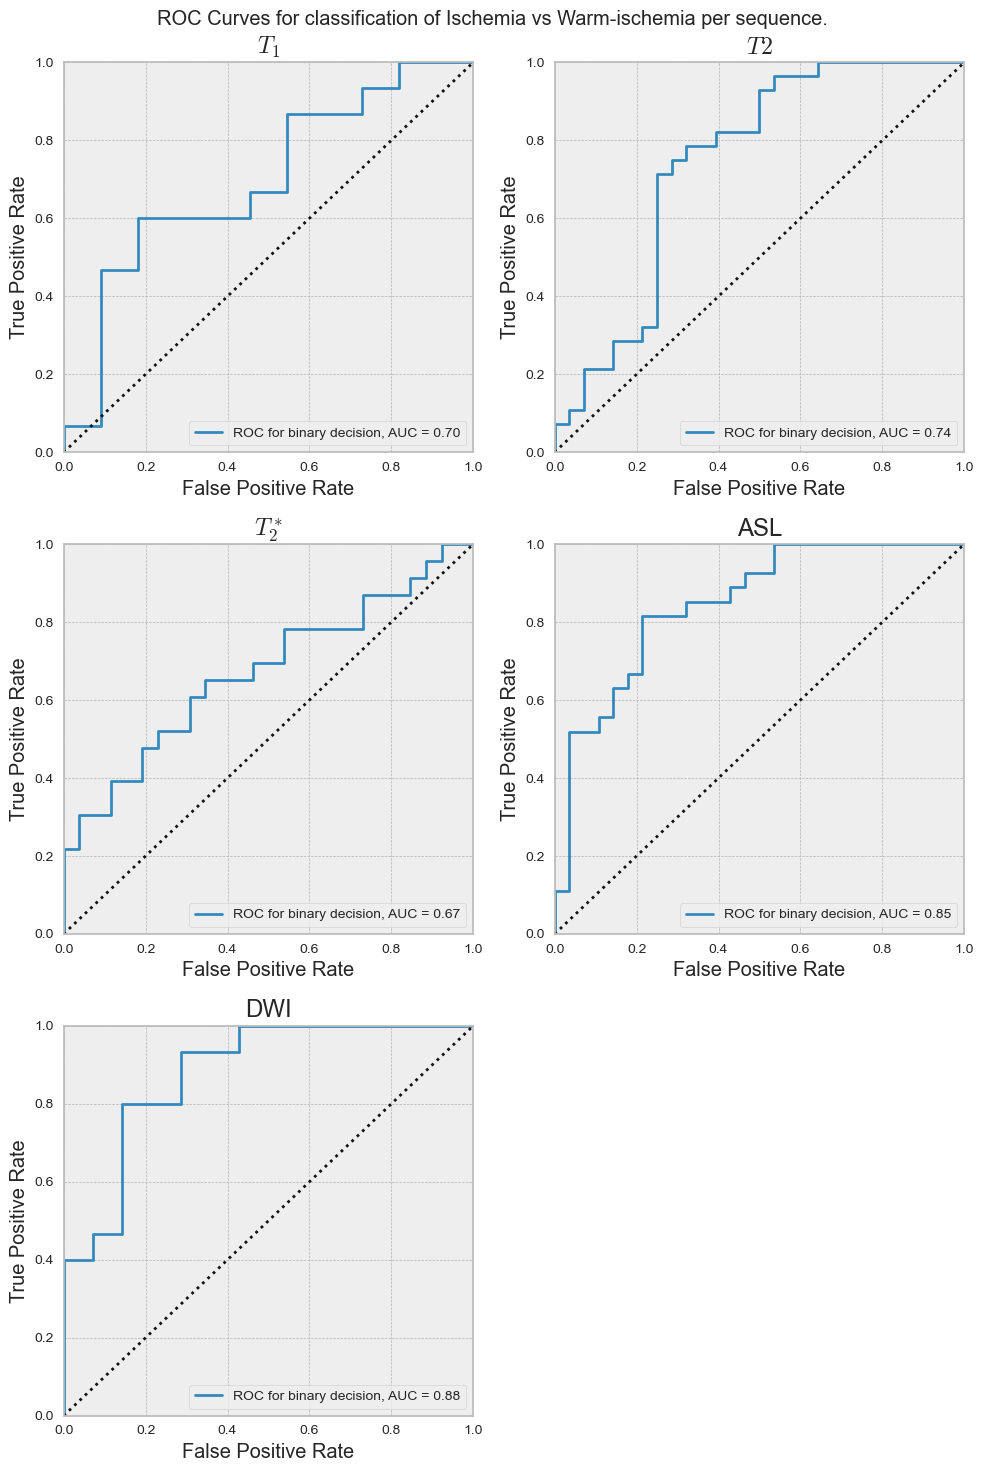

In [100]:
seed = 5
xtrain, xtest, ytrain, ytest = train_test_split(Xt1, yt1, train_size=.8, random_state=seed)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten()


xgb_model = XGBClassifier(colsample_bytree=0.91, 
                            learning_rate=0.015, 
                            max_depth=2, 
                            n_estimators=1000, 
                            subsample=0.6,
                            random_state=seed)

visualizer_T1 = ROCAUC(xgb_model,
                    classes=["ischemia", "warm-ischemia"],
                    ax = axes[0],
                    binary=True)

visualizer_T1.fit(xtrain, ytrain)
visualizer_T1.score(xtest, ytest)
visualizer_T1.finalize()
visualizer_T1.set_title(r"$T_1$")
t1_report = classification_report(ytest, visualizer_T1.predict(xtest))

xtrain, xtest, ytrain, ytest = train_test_split(Xt2, yt2, train_size=.8, random_state=seed)

xgb_model = XGBClassifier(colsample_bytree=0.91, 
                            learning_rate=0.015, 
                            max_depth=2, 
                            n_estimators=1000, 
                            subsample=0.6,
                            random_state=seed)

visualizer_T2 = ROCAUC(xgb_model,
                    classes=["ischemia", "warm-ischemia"],
                    ax = axes[1],
                    binary=True,
                    micro=False,
                    macro=False)

visualizer_T2.fit(xtrain, ytrain)
visualizer_T2.score(xtest, ytest)
visualizer_T2.finalize()
visualizer_T2.set_title(r"$T2$")

t2_report = classification_report(ytest, visualizer_T2.predict(xtest))

xtrain, xtest, ytrain, ytest = train_test_split(X2s, y2s, train_size=.8, random_state=seed)
xgb_model = XGBClassifier(colsample_bytree=0.91, 
                            learning_rate=0.015, 
                            max_depth=2, 
                            n_estimators=1000, 
                            subsample=0.6,
                            random_state=seed)

visualizer_T2s = ROCAUC(xgb_model,
                    classes=["ischemia", "warm-ischemia"],
                    ax=axes[2],
                    binary=True,
                    micro=False,
                    macro=False)

visualizer_T2s.fit(xtrain, ytrain)
visualizer_T2s.score(xtest, ytest)
visualizer_T2s.finalize()
visualizer_T2s.set_title(r"$T_2^*$")

t2s_report = classification_report(ytest, visualizer_T2s.predict(xtest))

xtrain, xtest, ytrain, ytest = train_test_split(Xa, ya, train_size=.8, random_state=seed)
xgb_model = XGBClassifier(colsample_bytree=0.91, 
                            learning_rate=0.015, 
                            max_depth=2, 
                            n_estimators=1000, 
                            subsample=0.6,
                            random_state=seed)

visualizer_asl = ROCAUC(xgb_model,
                    classes=["ischemia", "warm-ischemia"],
                    ax=axes[3],
                    binary=True,
                    micro=False,
                    macro=False)

visualizer_asl.fit(xtrain, ytrain)
visualizer_asl.score(xtest, ytest)
visualizer_asl.finalize()
visualizer_asl.set_title(r"ASL")

asl_report = classification_report(ytest, visualizer_asl.predict(xtest))

xtrain, xtest, ytrain, ytest = train_test_split(Xd, yd, train_size=.8, random_state=seed)
xgb_model = XGBClassifier(colsample_bytree=0.91, 
                            learning_rate=0.015, 
                            max_depth=2, 
                            n_estimators=1000, 
                            subsample=0.6,
                            random_state=seed)

visualizer_DWI = ROCAUC(xgb_model,
                    classes=["ischemia", "warm-ischemia"],
                    ax=axes[4],
                    binary=True,
                    micro=False,
                    macro=False)

visualizer_DWI.fit(xtrain, ytrain)
visualizer_DWI.score(xtest, ytest)
visualizer_DWI.finalize()
visualizer_DWI.set_title(r"DWI")

dwi_report = classification_report(ytest, visualizer_DWI.predict(xtest))
axes[5].axis('off')

plt.suptitle("ROC Curves for classification of Ischemia vs Warm-ischemia per sequence.")

plt.tight_layout()
plt.show()

In [101]:
print(t1_report)
print(t2_report)
print(t2s_report)
print(asl_report)
print(dwi_report)

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.67      0.80      0.73        15

    accuracy                           0.65        26
   macro avg       0.65      0.63      0.63        26
weighted avg       0.65      0.65      0.64        26

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        28
           1       0.71      0.71      0.71        28

    accuracy                           0.71        56
   macro avg       0.71      0.71      0.71        56
weighted avg       0.71      0.71      0.71        56

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        26
           1       0.64      0.61      0.62        23

    accuracy                           0.65        49
   macro avg       0.65      0.65      0.65        49
weighted avg       0.65      0.65      0.65        49

              preci

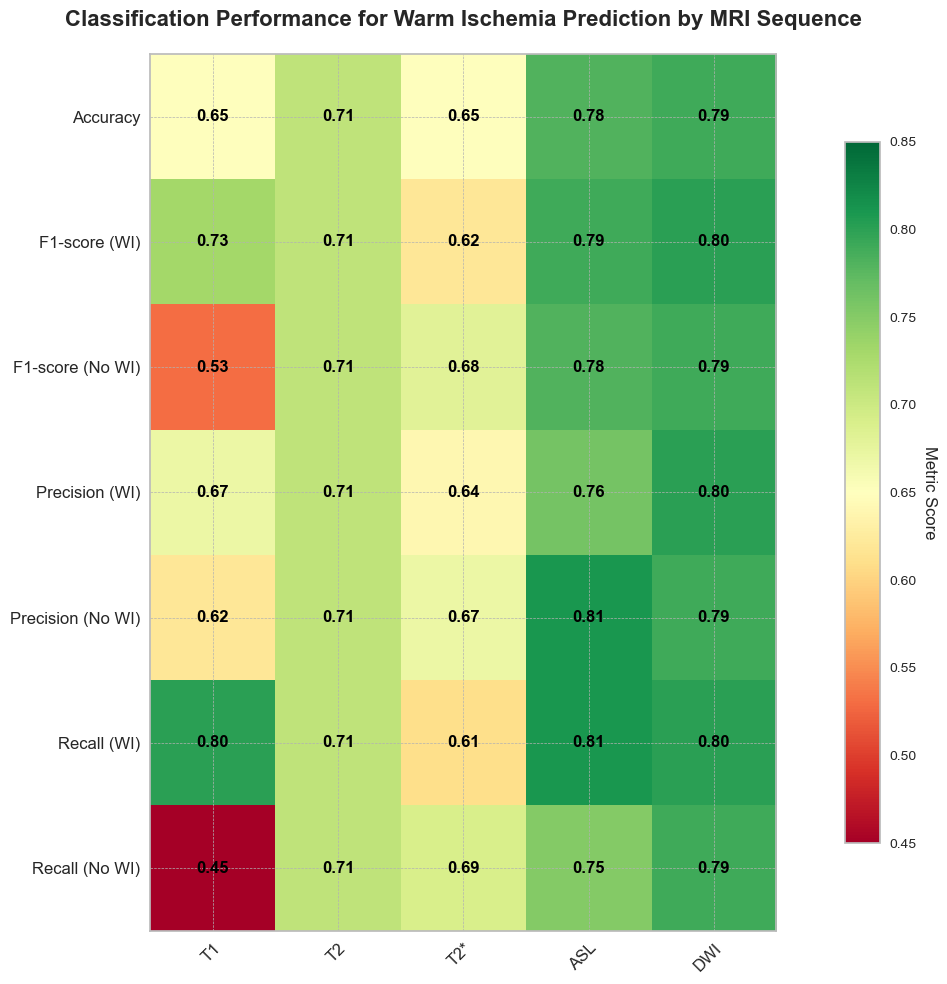

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data Preparation ---
# Store the classification results for the XGBoost models.
# Now includes metrics for both "Warm Ischemia" (WI) and "No Warm Ischemia" (No WI) classes.
results_data = {
    'T1': {
        'Accuracy': 0.65,
        'Precision (WI)': 0.67, 'Recall (WI)': 0.80, 'F1-score (WI)': 0.73,
        'Precision (No WI)': 0.62, 'Recall (No WI)': 0.45, 'F1-score (No WI)': 0.53,
    },
    'T2': {
        'Accuracy': 0.71,
        'Precision (WI)': 0.71, 'Recall (WI)': 0.71, 'F1-score (WI)': 0.71,
        'Precision (No WI)': 0.71, 'Recall (No WI)': 0.71, 'F1-score (No WI)': 0.71,
    },
    'T2*': {
        'Accuracy': 0.65,
        'Precision (WI)': 0.64, 'Recall (WI)': 0.61, 'F1-score (WI)': 0.62,
        'Precision (No WI)': 0.67, 'Recall (No WI)': 0.69, 'F1-score (No WI)': 0.68,
    },
    'ASL': {
        'Accuracy': 0.78,
        'Precision (WI)': 0.76, 'Recall (WI)': 0.81, 'F1-score (WI)': 0.79,
        'Precision (No WI)': 0.81, 'Recall (No WI)': 0.75, 'F1-score (No WI)': 0.78,
    },
    'DWI': {
        'Accuracy': 0.79,
        'Precision (WI)': 0.80, 'Recall (WI)': 0.80, 'F1-score (WI)': 0.80,
        'Precision (No WI)': 0.79, 'Recall (No WI)': 0.79, 'F1-score (No WI)': 0.79,
    }
}

# Define the order of models (now MRI sequences) and metrics for plotting
model_names = ['T1', 'T2', 'T2*', 'ASL', 'DWI']
metric_names = [
    'Accuracy',
    'F1-score (WI)', 'F1-score (No WI)',
    'Precision (WI)', 'Precision (No WI)',
    'Recall (WI)', 'Recall (No WI)'
]

# Create a 2D array of the data for the heatmap
# Rows correspond to metrics, columns correspond to models
data_array = np.array([[results_data[model][metric] for model in model_names] for metric in metric_names])


# --- Visualization ---
# Create a single figure and axes for the heatmap, adjusting size for more metrics
fig, ax = plt.subplots(figsize=(14, 10))

# Define the colormap and the normalization range
cmap = 'RdYlGn'
vmin = 0.45  # Adjusted to fit the new data range
vmax = 0.85  # Adjusted to fit the new data range

# Create the heatmap using imshow
im = ax.imshow(data_array, cmap=cmap, vmin=vmin, vmax=vmax)

# --- Annotation and Labels ---
# Set the ticks and labels for the x-axis (Models) and y-axis (Metrics)
ax.set_xticks(np.arange(len(model_names)))
ax.set_yticks(np.arange(len(metric_names)))
ax.set_xticklabels(model_names, fontsize=12)
ax.set_yticklabels(metric_names, fontsize=12)

# Rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metric_names)):
    for j in range(len(model_names)):
        value = data_array[i, j]
        # Determine text color based on the background color for better contrast
        text_color = 'black'
        ax.text(j, i, f'{value:.2f}', ha="center", va="center", color=text_color, fontsize=12, fontweight='bold')

# --- Final Touches ---
# Add a title to the plot
ax.set_title('Classification Performance for Warm Ischemia Prediction by MRI Sequence', fontsize=16, fontweight='bold', pad=20)

# Create a colorbar and set its label
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
cbar.ax.set_ylabel('Metric Score', rotation=-90, va="bottom", fontsize=12)

# Adjust layout to prevent labels from being cut off
fig.tight_layout()

# Display the plot
plt.show()


In [113]:
import shap

In [ ]:
_, xt2test, _, _ = train_test_split(Xt2, yt2, train_size=.8, random_state=seed)
_, xatest, _, _ = train_test_split(Xa, ya, train_size=.8, random_state=seed)
_, xdtest, _, _ = train_test_split(Xd, yd, train_size=.8, random_state=seed)


explainer_T2 = shap.Explainer(visualizer_T2.estimator)
explainer_asl = shap.Explainer(visualizer_asl.estimator)
explainer_dwi = shap.Explainer(visualizer_DWI.estimator)

T2_shap = explainer_T2(xt2test)
ASL_shap = explainer_asl(xatest)
DWI_shap = explainer_dwi(xdtest)

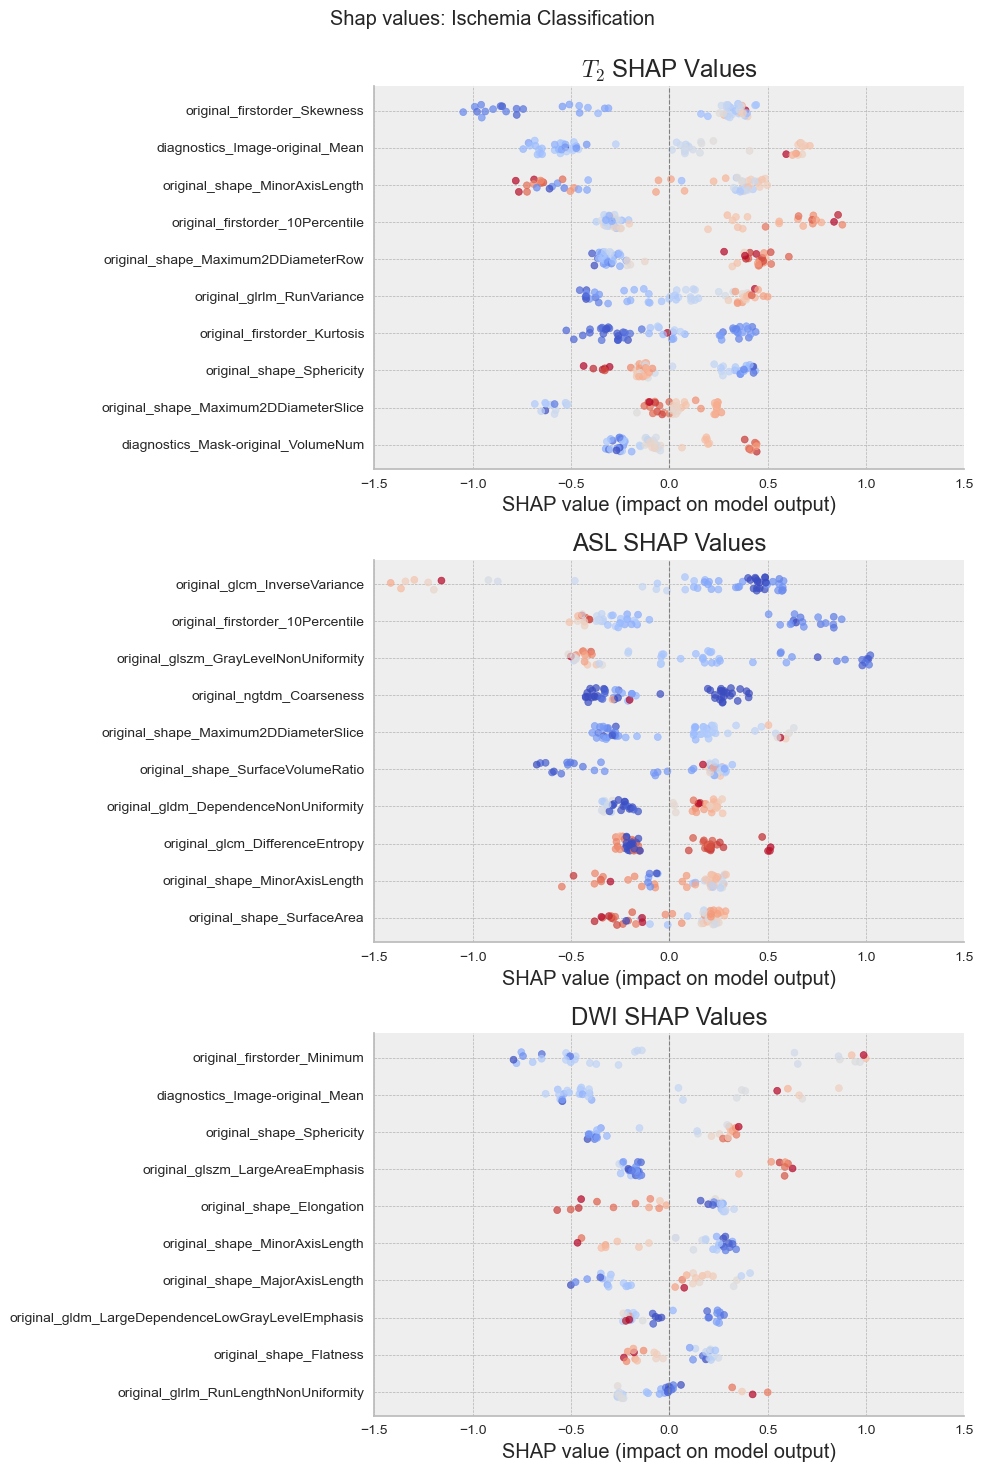

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

def custom_beeswarm(shap_explanation, ax, max_display=10, jitter=0.2):

    feature_names = shap_explanation.feature_names
    shap_values = shap_explanation.values
    feature_values = shap_explanation.data
    cmap = plt.get_cmap("coolwarm")

    mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
    feature_order = np.argsort(mean_abs_shap)[::-1]

    for i, feature_idx in enumerate(feature_order[:max_display]):
        y_position = max_display - 1 - i 
        current_shap_values = shap_values[:, feature_idx]
        current_feature_values = feature_values[:, feature_idx]
        norm_feature_values = (current_feature_values - np.nanmin(current_feature_values)) / \
                              (np.nanmax(current_feature_values) - np.nanmin(current_feature_values))
        y_jittered = np.random.uniform(y_position - jitter, y_position + jitter, len(current_shap_values))
        ax.scatter(current_shap_values, y_jittered, c=norm_feature_values, cmap=cmap, s=25, alpha=0.7, vmin=0, vmax=1)

    ax.set_yticks(range(max_display))
    ax.set_yticklabels([feature_names[i] for i in feature_order[:max_display]][::-1])
    ax.set_xlabel("SHAP value (impact on model output)")
    ax.axvline(x=0, color='grey', linestyle='--', linewidth=0.8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(-1.5, 1.5)


fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharey=False)

axes = axes.flatten()

custom_beeswarm(T2_shap, axes[0])
axes[0].set_title(r"$T_2$ SHAP Values")

custom_beeswarm(ASL_shap, axes[1])
axes[1].set_title("ASL SHAP Values")

custom_beeswarm(DWI_shap, axes[2])
axes[2].set_title("DWI SHAP Values")

norm = colors.Normalize(vmin=0, vmax=1)
sm = cm.ScalarMappable(cmap=plt.get_cmap("coolwarm"), norm=norm)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle("Shap values: Ischemia Classification")
plt.show()
